<a href="https://colab.research.google.com/github/KaiWoessner/NFLDataAnalysis/blob/main/QBStatsGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/QBStats.csv')

Mounted at /content/drive


In [ ]:
df.head()

,Year,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,2022,Patrick Mahomes,5250,8.1,648,435,67.1,41,12,105.2,272,42.0,73,13,67,26,188
1,2022,Justin Herbert,4739,6.8,699,477,68.2,25,10,93.2,228,32.6,50,7,55,38,206
2,2022,Tom Brady,4694,6.4,733,490,66.8,25,9,90.7,237,32.3,50,8,63,22,160
3,2022,Kirk Cousins,4547,7.1,643,424,65.9,29,14,92.5,230,35.8,47,10,66,46,329
4,2022,Joe Burrow,4475,7.4,606,414,68.3,35,12,100.8,219,36.1,53,10,60,41,259


In [ ]:
df1 = df[["Year", "Pass Yds"]]

In [ ]:
df1.head()

,Year,Pass Yds
0,2022,5250
1,2022,4739
2,2022,4694
3,2022,4547
4,2022,4475


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3177 entries, 0 to 3176
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Year      3177 non-null   int64
 1   Pass Yds  3177 non-null   int64
dtypes: int64(2)
memory usage: 49.8 KB


In [ ]:
df2 = df1.groupby('Year')['Pass Yds'].sum()

In [ ]:
df2.head()

Year
1970    64575
1971    62465
1972    60521
1973    57565
1974    61537
Name: Pass Yds, dtype: int64

In [ ]:
df2.loc[1970:1977] /= 14
df2.loc[1978:1981] /= 16
df2.loc[1982] /= 9
df2.loc[1983:1986] /= 16
df2.loc[1987] /= 15
df2.loc[1988:2020] /= 16
df2.loc[2021:2022] /= 17
df2.loc[1970:2022] /= 32

df2.head()

Year
1970    144.140625
1971    139.430804
1972    135.091518
1973    128.493304
1974    137.359375
Name: Pass Yds, dtype: float64

In [ ]:
years = df2.index
yds = df2.values

In [ ]:
for index_value in df2.index:
    print(index_value)

1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [ ]:
for index_value in df2.values:
    print(index_value)

144.140625
139.43080357142858
135.09151785714286
128.49330357142858
137.359375
146.953125
150.25446428571428
139.68526785714286
153.029296875
172.1640625
185.302734375
193.46484375
190.20486111111111
195.236328125
197.599609375
197.40625
196.416015625
192.68541666666667
189.294921875
198.546875
183.884765625
186.033203125
178.5859375
186.8515625
197.9375
219.1171875
206.3046875
204.166015625
206.103515625
220.048828125
213.498046875
212.279296875
225.21484375
211.287109375
223.49609375
217.16015625
218.244140625
226.935546875
222.3046875
230.708984375
234.896484375
243.30078125
244.478515625
251.65625
250.0078125
258.34375
254.765625
238.625
252.53515625
250.37109375
253.18359375
242.55330882352942
232.9246323529412


In [ ]:
coefficients = np.polyfit(years, yds, 1)
print(coefficients[1])
print(coefficients[0])

-4181.96321266478
2.1970791969004555


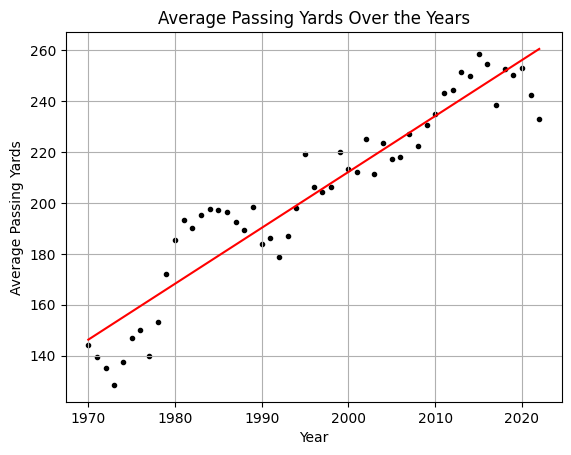

In [ ]:


plt.scatter(years, yds, marker='.', color='black')

trend_line = coefficients[0] * np.array(years) + coefficients[1]

plt.plot(years, trend_line, color='red', label='Trend Line')

plt.xlabel('Year')
plt.ylabel('Average Passing Yards')
plt.title('Average Passing Yards Over the Years')
plt.grid(True)

plt.show()

In [ ]:
df.head()

,Year,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,2022,Patrick Mahomes,5250,8.1,648,435,67.1,41,12,105.2,272,42.0,73,13,67,26,188
1,2022,Justin Herbert,4739,6.8,699,477,68.2,25,10,93.2,228,32.6,50,7,55,38,206
2,2022,Tom Brady,4694,6.4,733,490,66.8,25,9,90.7,237,32.3,50,8,63,22,160
3,2022,Kirk Cousins,4547,7.1,643,424,65.9,29,14,92.5,230,35.8,47,10,66,46,329
4,2022,Joe Burrow,4475,7.4,606,414,68.3,35,12,100.8,219,36.1,53,10,60,41,259


In [ ]:
def abbreviate_name(full_name):

    # Split the full name into words
    words = full_name.split()
    first = words[0][0] + " " + words[1]

    return first

# Apply the custom function to abbreviate the names and create a new column
df['Plyr'] = df['Player'].apply(abbreviate_name)

In [ ]:
df4 = df[df['Year'] > 1999]
df4 = df4[df4["Cmp"] > 100]

df_2022 = df4[df4['Year'] == 2022]

In [ ]:
def assign_color(year):
    if year == 2022:
        return 'blue'
    else:
        return 'aqua'

# Apply the custom function to create a 'Color' column in the DataFrame
df4['Color'] = df4['Year'].apply(assign_color)

In [ ]:
df4.head()
#df4.info()

,Year,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY,Plyr,Color
0,2022,Patrick Mahomes,5250,8.1,648,435,67.1,41,12,105.2,272,42.0,73,13,67,26,188,P Mahomes,blue
1,2022,Justin Herbert,4739,6.8,699,477,68.2,25,10,93.2,228,32.6,50,7,55,38,206,J Herbert,blue
2,2022,Tom Brady,4694,6.4,733,490,66.8,25,9,90.7,237,32.3,50,8,63,22,160,T Brady,blue
3,2022,Kirk Cousins,4547,7.1,643,424,65.9,29,14,92.5,230,35.8,47,10,66,46,329,K Cousins,blue
4,2022,Joe Burrow,4475,7.4,606,414,68.3,35,12,100.8,219,36.1,53,10,60,41,259,J Burrow,blue


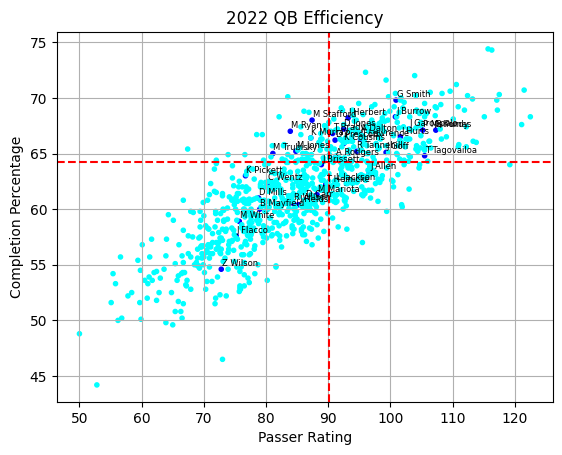

In [ ]:

mean_x = np.mean(df_2022["Rate"])
mean_y = np.mean(df_2022["Cmp %"])

plt.scatter(df4["Rate"], df4["Cmp %"], marker='.', c=df4["Color"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')


plt.xlabel('Passer Rating')
plt.ylabel('Completion Percentage')
plt.title('2022 QB Efficiency')
plt.grid(True)

for i, row in df_2022.iterrows():
    plt.text(row['Rate']+.1, row['Cmp %']+.3, row['Plyr'], fontsize=6)

plt.show()

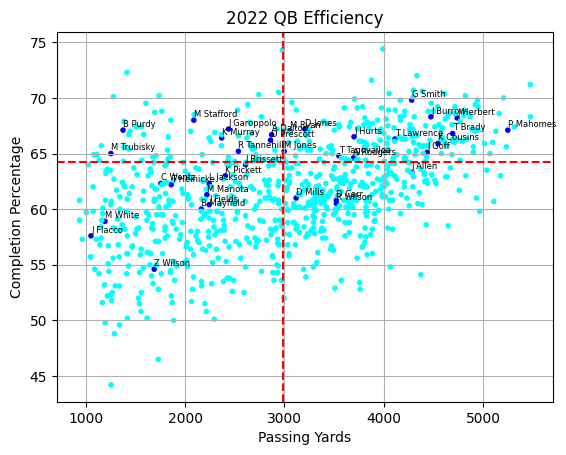

In [ ]:

mean_x = np.mean(df_2022["Pass Yds"])
mean_y = np.mean(df_2022["Cmp %"])

plt.scatter(df4["Pass Yds"], df4["Cmp %"], marker='.', c=df4["Color"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')


plt.xlabel('Passing Yards')
plt.ylabel('Completion Percentage')
plt.title('2022 QB Efficiency')
plt.grid(True)

for i, row in df_2022.iterrows():
    plt.text(row['Pass Yds']+.1, row['Cmp %']+.3, row['Plyr'], fontsize=6)

plt.show()